# 신경망 모델 훈련

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf # TensorFlow 라이브러리 임포트

tf.keras.utils.set_random_seed(42) # 케라스의 랜덤 시드 설정
tf.config.experimental.enable_op_determinism() # 텐서플로 연산을 결정적으로 설정

## 손실 곡선

In [6]:
from tensorflow import keras # 케라스 라이브러리 임포트
from sklearn.model_selection import train_test_split # 데이터셋을 훈련 세트와 검증 세트로 나누기

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data() # Fashion MNIST 데이터셋 불러오기

train_scaled = train_input / 255.0 # 입력 데이터를 0~1 범위로 정규화

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42) # 훈련 세트를 훈련 세트와 검증 세트로 나누기

In [7]:
def model_fn(a_layer=None):
    """
    모델을 생성하는 함수입니다.
    """
    model = keras.Sequential() # 모델 생성
    model.add(keras.layers.Flatten(input_shape=(28, 28))) # 입력 레이어
    model.add(keras.layers.Dense(100, activation='relu')) # 은닉 레이어
    if a_layer: # a_layer가 제공되면 해당 레이어를 추가
        model.add(a_layer) # 예시로 추가할 수 있는 레이어
    model.add(keras.layers.Dense(10, activation='softmax')) # 출력 레이어
    return model # 모델 생성 함수 호출

In [10]:
model = model_fn() # 모델 생성

model.summary() # 모델 요약 출력

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy']) # 모델 컴파일

history = model.fit(train_scaled, train_target, epochs=5, verbose=0) # 모델 훈련

In [12]:
print(history.history.keys()) # 훈련 과정에서 기록된 손실과 정확도 키 출력

dict_keys(['accuracy', 'loss'])


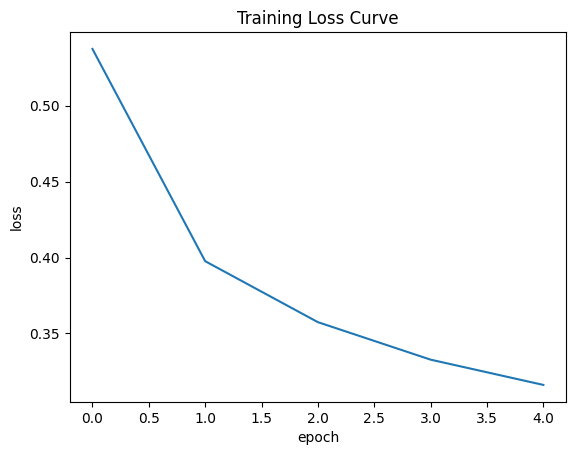

In [15]:
import matplotlib.pyplot as plt # 손실 곡선을 그리기 위한 matplotlib 임포트

plt.plot(history.history['loss']) # 훈련 손실 곡선 그리기
plt.xlabel('epoch') # x축 레이블 설정
plt.ylabel('loss') # y축 레이블 설정
plt.title('Training Loss Curve') # 그래프 제목 설정
plt.show() # 손실 곡선 출력

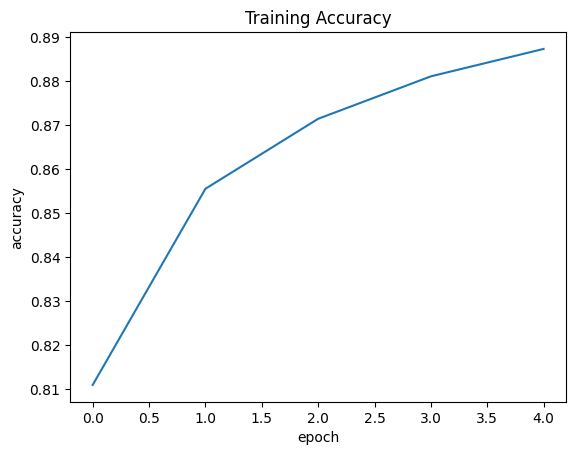

In [16]:
plt.plot(history.history['accuracy']) # 훈련 정확도 곡선 그리기
plt.xlabel('epoch') # x축 레이블 설정
plt.ylabel('accuracy') # y축 레이블 설정
plt.title('Training Accuracy') # 그래프 제목 설정
plt.show() # 정확도 곡선 출력

In [19]:
model = model_fn() # 모델 생성
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy']) # 모델 컴파일

history = model.fit(train_scaled, train_target, epochs=20, verbose=0) # 모델 훈련

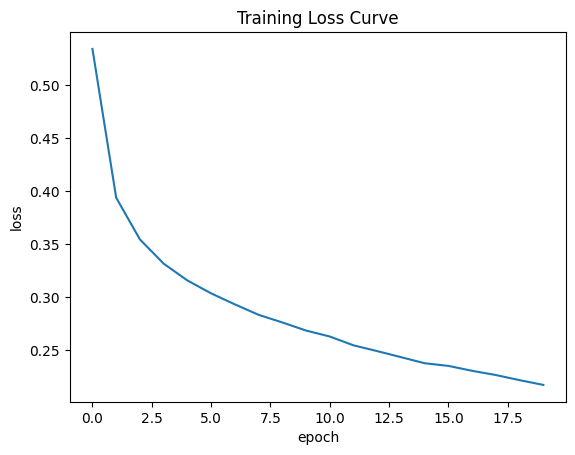

In [18]:
plt.plot(history.history['loss']) # 훈련 손실 곡선 그리기
plt.xlabel('epoch') # x축 레이블 설정
plt.ylabel('loss') # y축 레이블 설정
plt.title('Training Loss Curve') # 그래프 제목 설정
plt.show() # 손실 곡선 출력

## 검증 손실

In [23]:
model = model_fn() # 모델 생성
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy']) # 모델 컴파일

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target)) # 모델 훈련

In [21]:
print(history.history.keys()) # 훈련 과정에서 기록된 손실과 정확도 키 출력

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


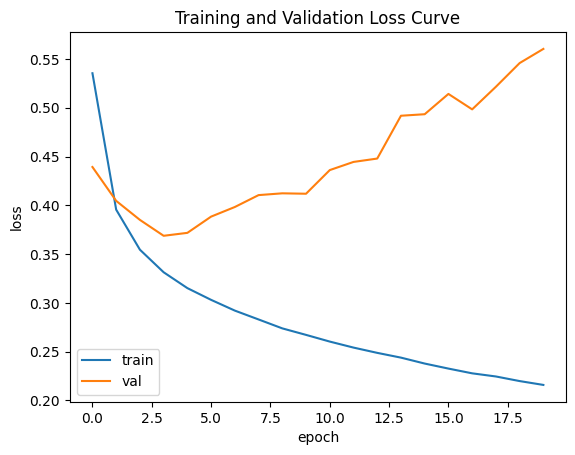

In [22]:
plt.plot(history.history['loss']) # 훈련 손실 곡선 그리기
plt.plot(history.history['val_loss']) # 검증 손실 곡선 그리기
plt.xlabel('epoch') # x축 레이블 설정
plt.ylabel('loss') # y축 레이블 설정
plt.title('Training and Validation Loss Curve') # 그래프 제목 설정
plt.legend(['train', 'val']) # 범례 추가
plt.show() # 손실 곡선 출력

In [24]:
model = model_fn() # 모델 생성
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # 모델 컴파일

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target)) # 모델 훈련

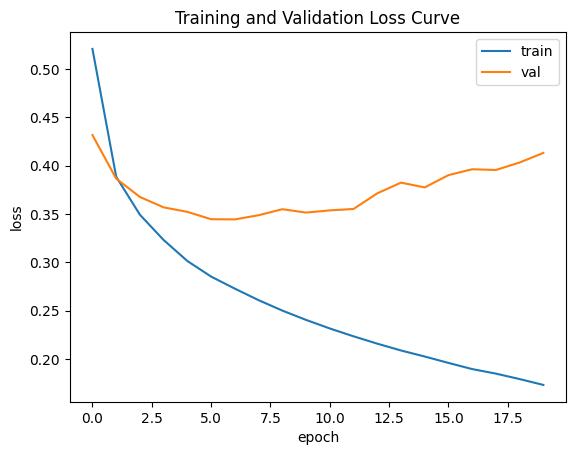

In [25]:
plt.plot(history.history['loss']) # 훈련 손실 곡선 그리기
plt.plot(history.history['val_loss']) # 검증 손실 곡선 그리기
plt.xlabel('epoch') # x축 레이블 설정
plt.ylabel('loss') # y축 레이블 설정
plt.title('Training and Validation Loss Curve') # 그래프 제목 설정
plt.legend(['train', 'val']) # 범례 추가
plt.show() # 손실 곡선 출력

## 드롭 아웃

In [30]:
model = model_fn() # 모델 생성

model.summary() # 모델 요약 출력

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # 모델 컴파일

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target)) # 모델 훈련

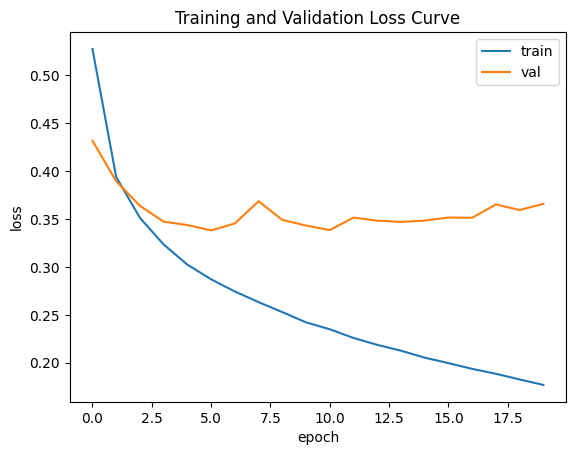

In [28]:
plt.plot(history.history['loss']) # 훈련 손실 곡선 그리기
plt.plot(history.history['val_loss']) # 검증 손실 곡선 그리기
plt.xlabel('epoch') # x축 레이블 설정
plt.ylabel('loss') # y축 레이블 설정
plt.title('Training and Validation Loss Curve') # 그래프 제목 설정
plt.legend(['train', 'val']) # 범례 추가
plt.show() # 손실 곡선 출력

## 모델 저장과 복원

In [31]:
model = model_fn(keras.layers.Dropout(0.3)) # 모델 생성
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # 모델 컴파일

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target)) # 모델 훈련

In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # 모델 컴파일

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target)) # 모델 훈련

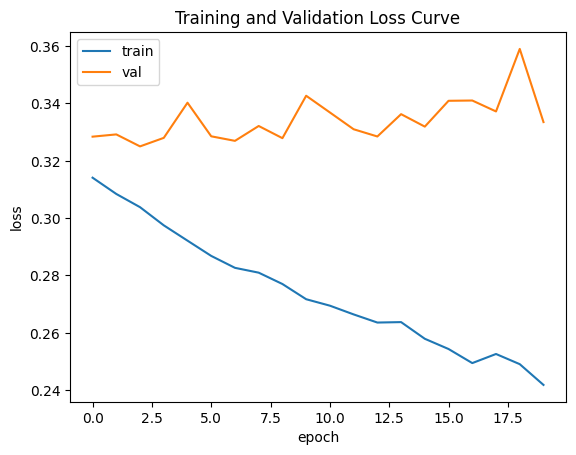

In [33]:
plt.plot(history.history['loss']) # 훈련 손실 곡선 그리기
plt.plot(history.history['val_loss']) # 검증 손실 곡선 그리기
plt.xlabel('epoch') # x축 레이블 설정
plt.ylabel('loss')  # y축 레이블 설정
plt.title('Training and Validation Loss Curve') # 그래프 제목 설정
plt.legend(['train', 'val']) # 범례 추가
plt.show() # 손실 곡선 출력

## 모델 저장과 복원

In [43]:
model = model_fn(keras.layers.Dropout(0.3)) # 모델 생성
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # 모델 컴파일

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target)) # 모델 훈련

In [37]:
model.save('models/model-whole.keras') # 모델 저장

In [39]:
model.save_weights('models/model.weights.h5') # 모델 가중치 저장

In [44]:
model = model_fn(keras.layers.Dropout(0.3)) # 모델 생성

model.load_weights('models/model.weights.h5') # 모델 가중치 불러오기

In [45]:
import numpy as np # NumPy 라이브러리 임포트

val_labels = np.argmax(model.predict(val_scaled), axis=-1) # 검증 세트에 대한 예측 수행
print(np.mean(val_labels == val_target)) # 검증 세트의 예측 정확도 출력

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.8788333333333334


In [47]:
model = keras.models.load_model('models/model-whole.keras') # 전체 모델 불러오기

model.evaluate(val_scaled, val_target) # 검증 세트에 대한 모델 평가

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8800 - loss: 0.3334


[0.33376339077949524, 0.8788333535194397]

## 콜백

In [50]:
model = model_fn(keras.layers.Dropout(0.3)) # 모델 생성
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # 모델 컴파일

checkpoint_cb = keras.callbacks.ModelCheckpoint('models/best-model.keras',
                                                save_best_only=True) # 체크포인트 콜백 생성

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb]) # 모델 훈련 및 체크포인트 저장

c:\Users\ryan9\miniconda3\envs\sesac_ai\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model = keras.models.load_model('models/best-model.keras') # 최상의 모델 불러오기

model.evaluate(val_scaled, val_target) # 검증 세트에 대한 모델 평가

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8869 - loss: 0.3159


[0.3205015957355499, 0.8840000033378601]

In [52]:
model = model_fn(keras.layers.Dropout(0.3)) # 모델 생성
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # 모델 컴파일

checkpoint_cb = keras.callbacks.ModelCheckpoint('models/best-model_2.keras', 
                                                save_best_only=True) # 체크포인트 콜백 생성
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, 
                                                restore_best_weights=True) # 조기 종료 콜백 생성

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb]) # 모델 훈련 및 체크포인트 저장

In [53]:
print(early_stopping_cb.stopped_epoch) # 조기 종료가 발생한 에폭 출력

9


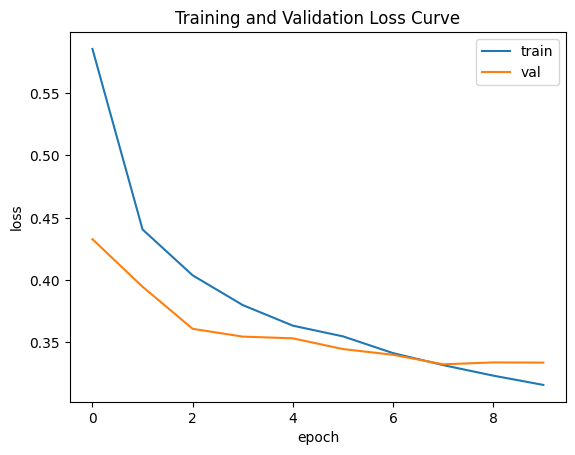

In [55]:
plt.plot(history.history['loss']) # 훈련 손실 곡선 그리기
plt.plot(history.history['val_loss']) # 검증 손실 곡선 그리기
plt.xlabel('epoch') # x축 레이블 설정
plt.ylabel('loss') # y축 레이블 설정
plt.title('Training and Validation Loss Curve') # 그래프 제목 설정
plt.legend(['train', 'val']) # 범례 추가
plt.show() # 손실 곡선 출력

In [56]:
model.evaluate(val_scaled, val_target) # 검증 세트에 대한 모델 평가

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8826 - loss: 0.3272


[0.3324510157108307, 0.8809166550636292]